### Student Activity: Beta Comparisons

This program reads in the daily closing prices of social media stocks—FB, TWTR, SNAP—and the S&P 500 as CSVs and calculates the rolling 30-day beta values of each social media to plot the trends in volatility relative to the market.

In [4]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path
%matplotlib inline

### Read CSVs in as DataFrames

In [5]:
# Read the daily closing prices of FB, set the `date` as a datetime index
fb_data = Path("../Resources/fb_data.csv")
fb_df = pd.read_csv(fb_data, index_col="date", parse_dates=True, infer_datetime_format=True)

# Read the daily closing prices of TWTR, set the `date` as a datetime index
twtr_data = Path("../Resources/twtr_data.csv")
twtr_df = pd.read_csv(twtr_data, index_col="date", parse_dates=True, infer_datetime_format=True)

# Read the daily closing prices of SNAP, set the `date` as a datetime index
snap_data = Path("../Resources/snap_data.csv")
snap_df = pd.read_csv(snap_data, index_col="date", parse_dates=True, infer_datetime_format=True)

# Read the daily closing prices of S&P 500, set the `date` as a datetime index
sp500_data = Path("../Resources/sp500_data.csv")
sp500_df = pd.read_csv(sp500_data, index_col="date", parse_dates=True, infer_datetime_format=True)
sp500_df.head()

,close
date,
2014-05-20,1872.829956
2014-05-21,1888.030029
2014-05-22,1892.489990
2014-05-23,1900.530029
2014-05-27,1911.910034


### Combine DataFrames, Sort Index, and Rename Columns

In [16]:
# Create a new pivot table where the columns are the closing prices for each ticker
all_data = pd.concat([fb_df, twtr_df, snap_df, sp500_df], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)0
all_data.sort_index()

# Set column names to 'AMZN' and 'S&P 500'
all_data.columns = [ "FB", "TWTR", "SNAP", "SP500" ]

# Display a few rows
all_data.head()

,FB,TWTR,SNAP,SP500
date,,,,
2019-05-17,185.30,37.50,11.49,2859.530029
2019-05-16,186.99,38.30,11.42,2876.320068
2019-05-15,186.27,37.90,10.66,2850.959961
2019-05-14,180.73,36.93,10.49,2834.409912
2019-05-13,181.54,36.59,10.11,2811.870117


### Calculate Daily Returns

In [17]:
# Use the `pct_change` function to calculate daily returns of closing prices for each column
daily_returns = all_data.pct_change()
daily_returns.head()

,FB,TWTR,SNAP,SP500
date,,,,
2019-05-17,NaN,NaN,NaN,NaN
2019-05-16,0.009120,0.021333,-0.006092,0.005872
2019-05-15,-0.003850,-0.010444,-0.066550,-0.008817
2019-05-14,-0.029742,-0.025594,-0.015947,-0.005805
2019-05-13,0.004482,-0.009207,-0.036225,-0.007952


### Calculate Covariance of Social Media Stock Returns vs. S&P 500 Returns

In [30]:
# Calculate covariance of all daily returns of social media stocks vs. S&P 500
fb_cov = daily_returns["FB"].cov(daily_returns["SP500"])
twtr_cov = daily_returns["TWTR"].cov(daily_returns["SP500"])
snap_cov = daily_returns["SNAP"].cov(daily_returns["SP500"])

[ fb_cov, twtr_cov, snap_cov]

[9.057133292975439e-05, 0.00010735216060481895, 8.143752411104528e-05]

### Calculate Variance of S&P 500 Returns

In [22]:
# Calculate variance of all daily returns of social media stocks vs. S&P 500
#fb_var = daily_returns["FB"].var()
#twtr_var = daily_returns["TWTR"].var()
#snap_var = daily_returns["SNAP"].var()
variance = daily_returns["SP500"].var()

variance

7.065620867765688e-05

### Calculate Beta Values of Social Media Stocks

In [26]:
# Calculate beta of all daily returns of social media stocks
beta_fb = fb_cov / variance
beta_twtr = twtr_cov / variance
beta_snap = snap_cov / variance

[ beta_fb, beta_twtr, beta_snap ]

[1.281859508524622, 1.5193591987729476, 1.1525883660496732]

### Calculate 30-Day Rolling Betas of AMZN Returns vs. S&P 500 Returns

date
2017-03-08   -0.767753
2017-03-07   -1.540314
2017-03-06   -0.991353
2017-03-03   -0.070131
2017-03-02    0.268084
dtype: float64

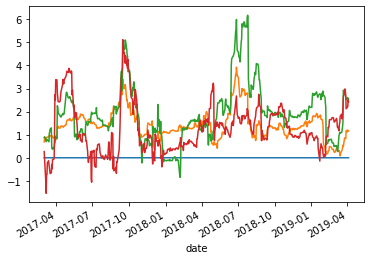

In [42]:
# Calculate 30-day rolling covariance of AMZN vs. S&P 500 and plot the data
fb_rolling_cov = daily_returns.rolling(window=30)["FB"].cov(daily_returns["SP500"].rolling(window=30))
fb_rolling_cov.plot()

twtr_rolling_cov = daily_returns.rolling(window=30)["TWTR"].cov(daily_returns["SP500"].rolling(window=30))

snap_rolling_cov = daily_returns.rolling(window=30)["SNAP"].cov(daily_returns["SP500"].rolling(window=30))

#fb_cov_last = daily_returns["FB"].tail(30).cov(daily_returns["SP500"].tail(30))
#print(fb_cov_last)

# Calculate 30-day rolling variance of S&P 500
rolling_variance_sp500 = daily_returns["SP500"].rolling(window=30).var()
rolling_variance_sp500.tail()

# Calculate 30-day rolling beta of AMZN and plot the data
rolling_beta_fb = fb_rolling_cov / rolling_variance_sp500
rolling_beta_twtr = twtr_rolling_cov / rolling_variance_sp500
rolling_beta_snap = snap_rolling_cov / rolling_variance_sp500

rolling_beta_fb.plot()
rolling_beta_twtr.plot()
rolling_beta_snap.plot()

rolling_beta_snap.tail()

### Plot Rolling 30-Day Betas of Social Media Stocks

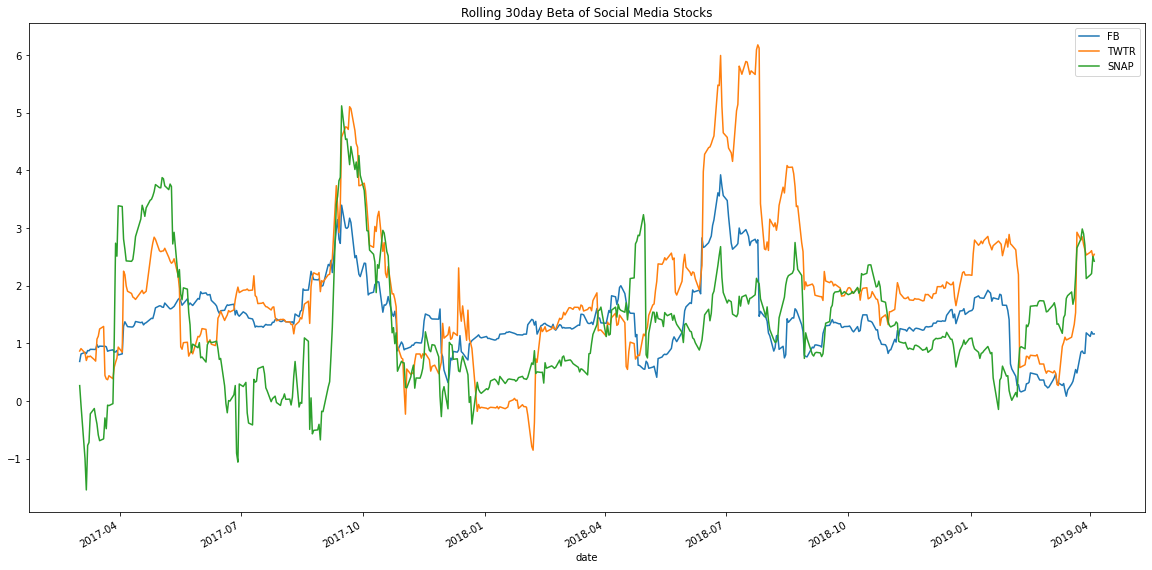

In [44]:
# Set the figure and plot the different datasets as multiple trends on the same figure
ax = rolling_beta_fb.plot(figsize=(20, 10), title="Rolling 30day Beta of Social Media Stocks")
rolling_beta_twtr.plot(ax=ax)
rolling_beta_snap.plot(ax=ax)

# Set the legend of the figure
ax.legend(["FB", "TWTR", "SNAP"])